In [1]:
import pandas as pd

In [2]:
graduate_path = r'2018년 2차_졸업생의 진로 현황(전체).xlsx'
raw_graduate = pd.read_excel(graduate_path, sheet_name = '2018_졸업생의 진로 현황(중)')

In [4]:
raw_graduate.head()

,시도교육청,지역교육청,지역,정보공시 \n 학교코드,학교명,학교급코드,설립구분,주야간,제외여부,제외사유,...,진학자 계.2,진학자 계.3,취업자,취업자.1,취업자.2,취업자.3,(미진학자)무직자 및 미상,(미진학자)무직자 및 미상.1,(미진학자)무직자 및 미상.2,(미진학자)무직자 및 미상.3
0,시도교육청,지역교육청,지역,정보공시 \n 학교코드,학교명,학교급코드,설립구분,주야간,제외여부,제외사유,...,합계,비율,남,여,합계,비율,남,여,합계,비율
1,서울특별시교육청,교육부,서울특별시 성북구,S000003514,서울대학교사범대학부설중학교,03,국립,주간,N,NaN,...,234,100,0,0,0,0,0,0,0,0
2,서울특별시교육청,교육부,서울특별시 종로구,S000003562,서울대학교사범대학부설여자중학교,03,국립,주간,N,NaN,...,172,100,0,0,0,0,0,0,0,0
3,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,S010000698,개원중학교,03,공립,주간,N,NaN,...,214,100,0,0,0,0,0,0,0,0
4,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,S010000700,경원중학교,03,공립,주간,N,NaN,...,310,100,0,0,0,0,0,0,0,0


In [6]:
raw_graduate.columns

Index(['시도교육청', '지역교육청', '지역', '정보공시 \n 학교코드', '학교명', '학교급코드', '설립구분', '주야간',
       '제외여부', '제외사유', '졸업자', '졸업자.1', '졸업자.2', '일반고 진학자', '일반고 진학자.1',
       '일반고 진학자.2', '일반고 진학자.3', '특성화고 진학자', '특성화고 진학자.1', '특성화고 진학자.2',
       '특성화고 진학자.3', '(특수목적고)과학고 진학자', '(특수목적고)과학고 진학자.1', '(특수목적고)과학고 진학자.2',
       '(특수목적고)과학고 진학자.3', '(특수목적고)외고ㆍ국제고 진학자', '(특수목적고)외고ㆍ국제고 진학자.1',
       '(특수목적고)외고ㆍ국제고 진학자.2', '(특수목적고)외고ㆍ국제고 진학자.3', '(특수목적고)예고ㆍ체고 진학자',
       '(특수목적고)예고ㆍ체고 진학자.1', '(특수목적고)예고ㆍ체고 진학자.2', '(특수목적고)예고ㆍ체고 진학자.3',
       '(특수목적고)마이스터고 진학자', '(특수목적고)마이스터고 진학자.1', '(특수목적고)마이스터고 진학자.2',
       '(특수목적고)마이스터고 진학자.3', '(자율고)자율형사립고 진학자', '(자율고)자율형사립고 진학자.1',
       '(자율고)자율형사립고 진학자.2', '(자율고)자율형사립고 진학자.3', '(자율고)자율형공립고 진학자',
       '(자율고)자율형공립고 진학자.1', '(자율고)자율형공립고 진학자.2', '(자율고)자율형공립고 진학자.3', '기타 진학자',
       '기타 진학자.1', '기타 진학자.2', '기타 진학자.3', '진학자 계', '진학자 계.1', '진학자 계.2',
       '진학자 계.3', '취업자', '취업자.1', '취업자.2', '취업자.3', '(미진학자)무직자 및 미상',
       '(미진학자)무직자 및 미상.1', '(미진학자)무직자 및 미상.2', '(

In [10]:
select_col = raw_graduate[['지역', '정보공시 \n 학교코드','졸업자.2', 
                           '(특수목적고)과학고 진학자.2','(특수목적고)외고ㆍ국제고 진학자.2']]
select_col.columns = ['지역''학교명', '학교코드', '졸업자', '과고', '외고']
graduate_date = select_col.drop(0)
graduate_date['과고'] = pd.to_numeric(graduate_date['과고'])
graduate_date['외고'] = pd.to_numeric(graduate_date['외고'])
graduate_date['졸업자'] = pd.to_numeric(graduate_date['졸업자'])
graduate_date['총합'] = graduate_date['과고'] + graduate_date['외고']

In [11]:
graduate_date.head()

,지역학교명,학교코드,졸업자,과고,외고,총합
1,서울특별시 성북구,S000003514,234.0,4.0,5.0,9.0
2,서울특별시 종로구,S000003562,172.0,0.0,8.0,8.0
3,서울특별시 강남구,S010000698,214.0,2.0,9.0,11.0
4,서울특별시 서초구,S010000700,310.0,5.0,4.0,9.0
5,서울특별시 강남구,S010000701,256.0,3.0,4.0,7.0


In [12]:
def get_sido(x):
    tmp = x.split(' ')[0]
    if len(tmp) != 4:
        return tmp[:2]
    else:
        return tmp[0]+tmp[2]
    

In [14]:
graduate_date['시도'] = graduate_date['지역학교명'].dropna().apply(get_sido)
graduate_date['구군'] = graduate_date['지역학교명'].dropna().apply(lambda x:x.split(' ')[1])

In [15]:
graduate_date.head()

,지역학교명,학교코드,졸업자,과고,외고,총합,시도,구군
1,서울특별시 성북구,S000003514,234.0,4.0,5.0,9.0,서울,성북구
2,서울특별시 종로구,S000003562,172.0,0.0,8.0,8.0,서울,종로구
3,서울특별시 강남구,S010000698,214.0,2.0,9.0,11.0,서울,강남구
4,서울특별시 서초구,S010000700,310.0,5.0,4.0,9.0,서울,서초구
5,서울특별시 강남구,S010000701,256.0,3.0,4.0,7.0,서울,강남구


In [16]:
graduate_date[ graduate_date['지역학교명'].isna()]

,지역학교명,학교코드,졸업자,과고,외고,총합,시도,구군
588,NaN,S020002009,317.0,1.0,5.0,6.0,NaN,NaN
3011,NaN,S150002889,15.0,0.0,0.0,0.0,NaN,NaN


In [17]:
graduate_date[588, '시도'] = '부산'
graduate_date[588, '구군'] = '기장군'
graduate_date[3011, '시도'] = '경북'
graduate_date[3011, '구군'] = '예천군'

In [18]:
def graduate_preprocessing(path):
    raw_graduate = pd.read_excel(path, sheet_name = '2018_졸업생의 진로 현황(중)')
    select_col = raw_graduate[['지역', '정보공시 \n 학교코드','졸업자.2', 
                           '(특수목적고)과학고 진학자.2','(특수목적고)외고ㆍ국제고 진학자.2']]
    select_col.columns = ['지역''학교명', '학교코드', '졸업자', '과고', '외고']
    graduate_date = select_col.drop(0)
    graduate_date['과고'] = pd.to_numeric(graduate_date['과고'])
    graduate_date['외고'] = pd.to_numeric(graduate_date['외고'])
    graduate_date['졸업자'] = pd.to_numeric(graduate_date['졸업자'])
    graduate_date['총합'] = graduate_date['과고'] + graduate_date['외고']
    
    def get_sido(x):
        tmp = x.split(' ')[0]
        if len(tmp) != 4:
            return tmp[:2]
        else:
            return tmp[0]+tmp[2]
    
    graduate_date['시도'] = graduate_date['지역학교명'].dropna().apply(get_sido)
    graduate_date['구군'] = graduate_date['지역학교명'].dropna().apply(lambda x:x.split(' ')[1])
    
    graduate_date[588, '시도'] = '부산'
    graduate_date[588, '구군'] = '기장군'
    graduate_date[3011, '시도'] = '경북'
    graduate_date[3011, '구군'] = '예천군'
    
    return graduate_date

In [20]:
row_price = pd.read_excel('평균매매가격_아파트.xlsx', skiprows=10)

In [23]:
row_price.head(20)

,지 역,Unnamed: 1,Unnamed: 2,Unnamed: 3,2012년 01월,2012년 02월,2012년 03월,2012년 04월,2012년 05월,2012년 06월,...,2017년 12월,2018년 01월,2018년 02월,2018년 03월,2018년 04월,2018년 05월,2018년 06월,2018년 07월,2018년 08월,2018년 09월
0,전국,NaN,NaN,NaN,264474,264035,263470,262630,261823,260425,...,313552,315961,318503,319757,320248,320271,320157,320135,320944,323915
1,수도권,NaN,NaN,NaN,365249,364275,362790,360918,359253,356737,...,427909,433036,438388,441072,442293,442791,443063,443484,445796,452134
2,지방권,NaN,NaN,NaN,163394,163491,163849,164044,164096,163820,...,205138,204969,204847,204747,204545,204117,203639,203196,202580,202359
3,6대광역시,NaN,NaN,NaN,195186,194989,195093,195037,194851,194273,...,257439,257577,257757,257913,258022,257979,257734,257504,257083,257274
4,5대광역시,NaN,NaN,NaN,190421,190312,190555,190603,190631,190183,...,256837,257017,257173,257333,257482,257461,257185,256982,256667,256974
5,9개도,NaN,NaN,NaN,211371,211340,211142,210804,210270,209478,...,238036,238264,239005,239525,239805,239625,239447,239152,238908,240035
6,8개도,NaN,NaN,NaN,139237,139518,139979,140306,140378,140256,...,158639,158150,157775,157425,156891,156081,155401,154716,153821,153151
7,서울,NaN,NaN,NaN,540954,538876,536079,532409,529733,525131,...,659905,673522,686220,691838,693673,694435,694739,695931,702383,716453
8,NaN,강북지역,NaN,NaN,405962,405406,404184,402746,401085,398926,...,495826,499764,505766,510345,512411,514258,516310,518747,523574,531666
9,NaN,NaN,도심권,NaN,706316,705830,702286,701482,700462,696729,...,843657,853086,870844,881688,886041,889833,893521,899063,912257,924886


In [22]:
row_price.columns

Index(['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', '2012년 01월',
       '2012년 02월', '2012년 03월', '2012년 04월', '2012년 05월', '2012년 06월',
       '2012년 07월', '2012년 08월', '2012년 09월', '2012년 10월', '2012년 11월',
       '2012년 12월', '2013년 01월', '2013년 02월', '2013년 03월', '2013년 04월',
       '2013년 05월', '2013년 06월', '2013년 07월', '2013년 08월', '2013년 09월',
       '2013년 10월', '2013년 11월', '2013년 12월', '2014년 01월', '2014년 02월',
       '2014년 03월', '2014년 04월', '2014년 05월', '2014년 06월', '2014년 07월',
       '2014년 08월', '2014년 09월', '2014년 10월', '2014년 11월', '2014년 12월',
       '2015년 01월', '2015년 02월', '2015년 03월', '2015년 04월', '2015년 05월',
       '2015년 06월', '2015년 07월', '2015년 08월', '2015년 09월', '2015년 10월',
       '2015년 11월', '2015년 12월', '2016년 01월', '2016년 02월', '2016년 03월',
       '2016년 04월', '2016년 05월', '2016년 06월', '2016년 07월', '2016년 08월',
       '2016년 09월', '2016년 10월', '2016년 11월', '2016년 12월', '2017년 01월',
       '2017년 02월', '2017년 03월', '2017년 04월', '2017년 05월', '2017년 0

In [24]:
k = row_price[['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']].iloc[0]
k

지 역            전국
Unnamed: 1    NaN
Unnamed: 2    NaN
Unnamed: 3    NaN
Name: 0, dtype: object

In [25]:
k[3::-1]

Unnamed: 3    NaN
Unnamed: 2    NaN
Unnamed: 1    NaN
지 역            전국
Name: 0, dtype: object

In [26]:
big_col = []
for num, tmp in enumerate(row_price['지 역']):
    if pd.isna(tmp):
        big_col.append(big_col[num-1])
    else:
        big_col.append(tmp)

small_col = []
for num in range(len(row_price)):
    tmp_list = list(row_price[['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']].iloc[num])
    for tmp in tmp_list[3::-1]:
        if not pd.isna(tmp):
            small_col.append(tmp)
            break

row_price.index = [big_col, small_col]

In [28]:
transposed_price = row_price.drop(['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis=1).T
transposed_price.head()

전국     수도권     지방권   6대광역시   5대광역시     9개도     8개도      서울  \
               전국     수도권     지방권   6대광역시   5대광역시     9개도     8개도      서울   
2012년 01월  264474  365249  163394  195186  190421  211371  139237  540954   
2012년 02월  264035  364275  163491  194989  190312  211340  139518  538876   
2012년 03월  263470  362790  163849  195093  190555  211142  139979  536079   
2012년 04월  262630  360918  164044  195037  190603  210804  140306  532409   
2012년 05월  261823  359253  164096  194851  190631  210270  140378  529733   

                           ...      경남                                  \
             강북지역     도심권  ...     진주시     통영시     사천시     김해시     밀양시   
2012년 01월  405962  706316  ...  157468  143155  101292  172711  105897   
2012년 02월  405406  705830  ...  157582  143155  101292  171124  105897   
2012년 03월  404184  702286  ...  159802  143507  101519  169589  105897   
2012년 04월  402746  701482  ...  159814  143162  101519  168874  105971   
2012년 05월  401085  700462  ...  159700  143207  101519  168084  105971   

                               제주                 
              거제시     양산시      제주     제주시   서귀포시  
2012년 01월  181049  130287  134994  145425  80868  
2012년 02월  181585  130202  139424  150436  82283  
2012년 03월  182488  129489  139830  150769  83067  
2012년 04월  183663  128351  141365  152481  83683  
2012년 05월  183272  127287  144561  155972  85350  

[5 rows x 236 columns]

In [29]:
time_index = []
for time in transposed_price.index:
    tmp = time.split(' ')
    time_index.append(tmp[0][:-1] + '.' + tmp[1][:-1])

transposed_price.index = pd.to_datetime(time_index)

In [30]:
transposed_price.head()

전국     수도권     지방권   6대광역시   5대광역시     9개도     8개도      서울  \
                전국     수도권     지방권   6대광역시   5대광역시     9개도     8개도      서울   
2012-01-01  264474  365249  163394  195186  190421  211371  139237  540954   
2012-02-01  264035  364275  163491  194989  190312  211340  139518  538876   
2012-03-01  263470  362790  163849  195093  190555  211142  139979  536079   
2012-04-01  262630  360918  164044  195037  190603  210804  140306  532409   
2012-05-01  261823  359253  164096  194851  190631  210270  140378  529733   

                            ...      경남                                  \
              강북지역     도심권  ...     진주시     통영시     사천시     김해시     밀양시   
2012-01-01  405962  706316  ...  157468  143155  101292  172711  105897   
2012-02-01  405406  705830  ...  157582  143155  101292  171124  105897   
2012-03-01  404184  702286  ...  159802  143507  101519  169589  105897   
2012-04-01  402746  701482  ...  159814  143162  101519  168874  105971   
2012-05-01  401085  700462  ...  159700  143207  101519  168084  105971   

                                제주                 
               거제시     양산시      제주     제주시   서귀포시  
2012-01-01  181049  130287  134994  145425  80868  
2012-02-01  181585  130202  139424  150436  82283  
2012-03-01  182488  129489  139830  150769  83067  
2012-04-01  183663  128351  141365  152481  83683  
2012-05-01  183272  127287  144561  155972  85350  

[5 rows x 236 columns]

In [31]:
def mean_apt_price_preprocessing(path):
    row_price = pd.read_excel(path, skiprows=10)
    big_col = []
    for num, tmp in enumerate(row_price['지 역']):
        if pd.isna(tmp):
            big_col.append(big_col[num-1])
        else:
            big_col.append(tmp)

    small_col = []
    for num in range(len(row_price)):
        tmp_list = list(row_price[['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']].iloc[num])
        for tmp in tmp_list[3::-1]:
            if not pd.isna(tmp):
                small_col.append(tmp)
                break

    row_price.index = [big_col, small_col]
    transposed_price = row_price.drop(['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis=1).T
    time_index = []
    for time in transposed_price.index:
        tmp = time.split(' ')
        time_index.append(tmp[0][:-1] + '.' + tmp[1][:-1])

    transposed_price.index = pd.to_datetime(time_index)
    return transposed_price

In [32]:
graduate_path = r'2018년 2차_졸업생의 진로 현황(전체).xlsx'
grad_df = graduate_preprocessing(graduate_path)
grad_df.groupby('시도').sum()

,졸업자,과고,외고,총합
시도,,,,
강원,14383.0,64.0,133.0,197.0
경기,120572.0,361.0,2183.0,2544.0
경남,31481.0,195.0,342.0,537.0
경북,22570.0,101.0,133.0,234.0
광주,16369.0,70.0,84.0,154.0
대구,22842.0,98.0,153.0,251.0
대전,14988.0,100.0,261.0,361.0
부산,26727.0,229.0,762.0,991.0
서울,76687.0,535.0,1449.0,1984.0


In [34]:
grad_sido = grad_df.groupby('시도').sum()
grad_sido.sort_values(by='총합', ascending=False)

,졸업자,과고,외고,총합
시도,,,,
경기,120572.0,361.0,2183.0,2544.0
서울,76687.0,535.0,1449.0,1984.0
부산,26727.0,229.0,762.0,991.0
인천,26046.0,181.0,559.0,740.0
경남,31481.0,195.0,342.0,537.0
대전,14988.0,100.0,261.0,361.0
충북,14831.0,51.0,203.0,254.0
대구,22842.0,98.0,153.0,251.0
울산,10759.0,76.0,165.0,241.0


In [35]:
grad_sido['진학률'] = grad_sido['총합'] / grad_sido['졸업자'] * 100
grad_sido.sort_values(by='진학률', ascending=False)

,졸업자,과고,외고,총합,진학률
시도,,,,,
부산,26727.0,229.0,762.0,991.0,3.707861
세종,2702.0,18.0,69.0,87.0,3.219837
인천,26046.0,181.0,559.0,740.0,2.841127
서울,76687.0,535.0,1449.0,1984.0,2.587140
대전,14988.0,100.0,261.0,361.0,2.408594
울산,10759.0,76.0,165.0,241.0,2.239985
제주,6487.0,36.0,102.0,138.0,2.127332
경기,120572.0,361.0,2183.0,2544.0,2.109943
충북,14831.0,51.0,203.0,254.0,1.712629


In [38]:
price_path = r'평균매매가격_아파트.xlsx'
price_data = mean_apt_price_preprocessing(price_path)

sido_list = []
for i in grad_sido.index:
    sido_list.append(price_data.loc['2018-6-1'][i][i])
grad_sido['평균매매가격'] = sido_list

In [40]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [41]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

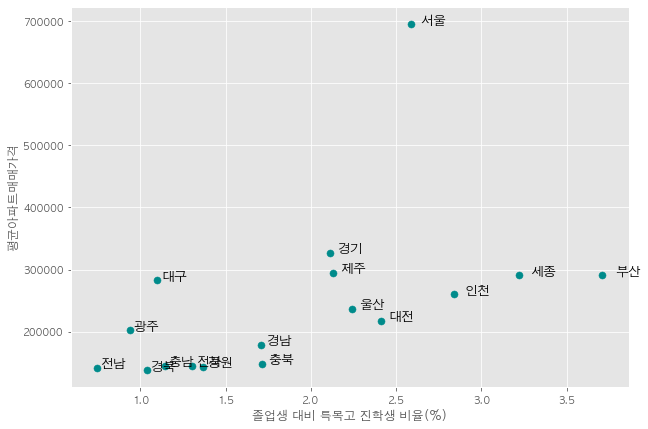

In [45]:
plt.figure(figsize=(10, 7))
plt.scatter(grad_sido['진학률'], grad_sido['평균매매가격'], color='darkcyan', s=50)
plt.xlabel('졸업생 대비 특목고 진학생 비율(%)')
plt.ylabel('평균아파트매매가격')

for name in grad_sido.index:
    plt.text(grad_sido['진학률'][name]*1.02, grad_sido['평균매매가격'][name], name, fontsize=13)
plt.show()

In [47]:
import seaborn as sns

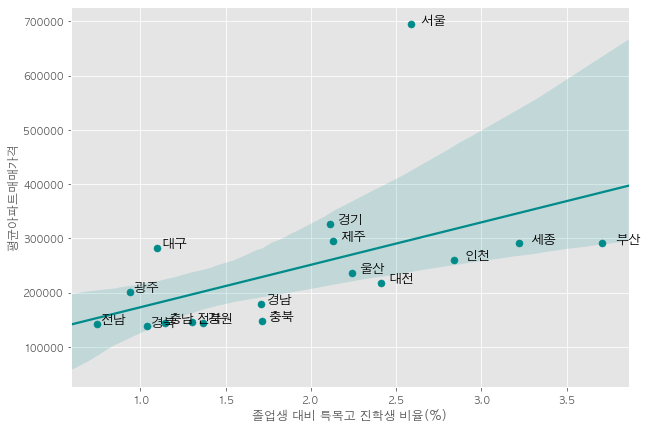

In [48]:
plt.figure(figsize=(10, 7))
plt.scatter(grad_sido['진학률'], grad_sido['평균매매가격'], color='darkcyan', s=50)
sns.regplot(grad_sido['진학률'], grad_sido['평균매매가격'], scatter=False, color='darkcyan')
plt.xlabel('졸업생 대비 특목고 진학생 비율(%)')
plt.ylabel('평균아파트매매가격')
for name in grad_sido.index:
    plt.text(grad_sido['진학률'][name]*1.02, grad_sido['평균매매가격'][name], name, fontsize=13)
plt.show()

In [53]:
local = '서울'
grad_gu = grad_df[grad_df['시도'] == local].groupby('구군').sum()
grad_gu['진학률'] = grad_gu['총합']/grad_gu['졸업자']*100

In [54]:
grad_gu['평균매매가격'] = price_data.loc['2018-6-1'][local][grad_gu.index]

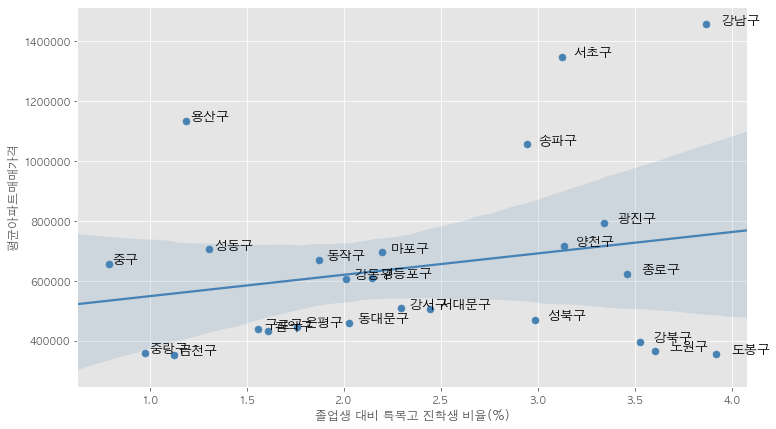

In [55]:
plt.figure(figsize=(12, 7))
plt.scatter(grad_gu['진학률'], grad_gu['평균매매가격'], color='steelblue', s=50)
sns.regplot(grad_gu['진학률'], grad_gu['평균매매가격'], scatter=False, color='steelblue')
plt.xlabel('졸업생 대비 특목고 진학생 비율(%)')
plt.ylabel('평균아파트매매가격')
for name in grad_gu.index:
    plt.text(grad_gu['진학률'][name]*1.02, grad_gu['평균매매가격'][name], name, fontsize=13)
plt.show()

In [58]:
aca_path = r'2018년 시도별 행정구역별 사설학원 현황.xlsx'
aca_raw = pd.read_excel(aca_path, skiprows=3)
aca_raw.head()

,조사연도,시도,행정구역,종류,분야,학원수,정원\n(수강자수),강사수,강의실수,월평균교습시간,월평균교습비(원)
0,2018,서울,종로구,학교교과교습학원,입시검정및보습,73,226260,530,345,27,234594
1,2018,서울,종로구,학교교과교습학원,국제화,5,2203,36,34,50,504929
2,2018,서울,종로구,학교교과교습학원,예능,13,1151,107,2,22,168979
3,2018,서울,종로구,학교교과교습학원,특수교육,1,90,3,1,15,165777
4,2018,서울,종로구,학교교과교습학원,기타,7,910,35,4,38,309062


In [59]:
aca_raw.columns

Index(['조사연도', '시도', '행정구역', '종류', '분야', '학원수', '정원\n(수강자수)', '강사수', '강의실수',
       '월평균교습시간', '월평균교습비(원)'],
      dtype='object')

In [60]:
aca_data = aca_row[aca_row['분야'] == '입시검정및보습']
aca_data = aca_data[['시도', '행정구역', '학원수', '정원\n(수강자수)', '강사수', '강의실수',
       '월평균교습시간', '월평균교습비(원)']]
aca_data.columns = ['시도', '구군', '학원수', '수강자수', '강사수', '강의실수', '월평균교습시간', '월평균교습비']
aca_data.head()

,시도,구군,학원수,수강자수,강사수,강의실수,월평균교습시간,월평균교습비
0,서울,종로구,73,226260,530,345,27,234594
14,서울,중구,38,8920,505,247,27,238084
28,서울,용산구,65,10083,238,325,27,259083
42,서울,성동구,159,26295,636,797,37,239741
56,서울,광진구,244,37350,1068,1279,33,265232


In [62]:
aca_sido['학원수'].shape

(17,)

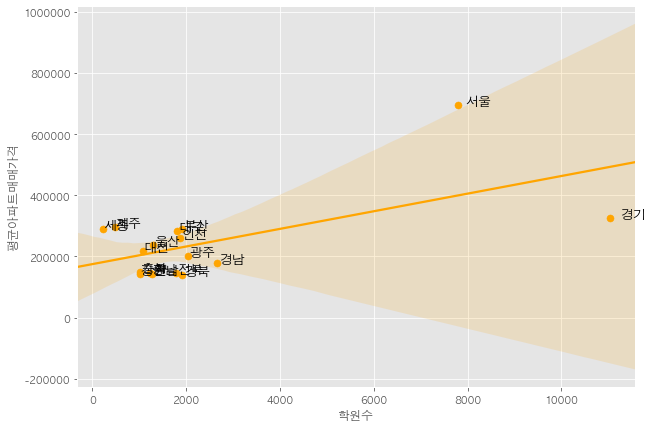

In [65]:
aca_sido = aca_data.groupby('시도').sum()
sido_list = []
for i in aca_sido.index:
    sido_list.append(price_data.loc['2018-6-1'][i][i])

aca_sido['평균매매가격'] = sido_list

plt.figure(figsize=(10, 7))
plt.scatter(aca_sido['학원수'], aca_sido['평균매매가격'], color='orange', s=50)
sns.regplot(aca_sido['학원수'], aca_sido['평균매매가격'], scatter=False, color='orange')
plt.xlabel('학원수')
plt.ylabel('평균아파트매매가격')
for name in aca_sido.index:
    plt.text(aca_sido['학원수'][name]*1.02 , aca_sido['평균매매가격'][name], name, fontsize=13)
plt.show()

In [67]:
local='서울'
aca_gu = aca_data[aca_data['시도'] == local].groupby('구군').sum()
study_df = pd.merge(grad_gu, aca_gu, how='outer', right_index=True, left_index=True)
study_df['평균매매가격'] = pd.to_numeric(price_data.loc['2018-6-1'][local][study_df.index])

In [68]:
study_df

,졸업자,과고,외고,총합,진학률,평균매매가격,학원수,수강자수,강사수,강의실수,월평균교습시간,월평균교습비
구군,,,,,,,,,,,,
강남구,5224.0,80.0,122.0,202.0,3.866769,1455855,1138,235580,11726,5999,26,369130
강동구,3575.0,16.0,56.0,72.0,2.013986,605960,400,34498,1487,2097,24,235849
강북구,2355.0,14.0,69.0,83.0,3.524416,396257,150,31389,653,789,24,218034
강서구,3836.0,18.0,70.0,88.0,2.294056,508195,433,64103,1679,2192,23,226887
관악구,2793.0,16.0,29.0,45.0,1.611171,432283,226,20422,963,1185,24,220558
광진구,2932.0,29.0,69.0,98.0,3.342428,793447,244,37350,1068,1279,33,265232
구로구,2890.0,13.0,32.0,45.0,1.557093,439517,235,27418,997,1232,30,219916
금천구,1600.0,8.0,10.0,18.0,1.125000,352957,121,18101,591,645,25,223074
노원구,6161.0,46.0,176.0,222.0,3.603311,365706,489,79992,2885,2825,26,244025


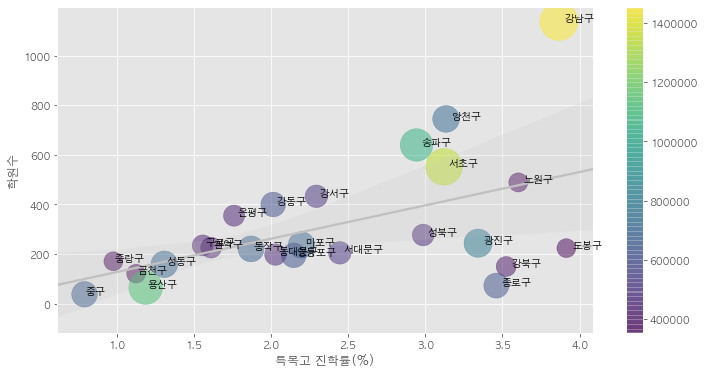

In [69]:
plt.figure(figsize=(12, 6))
# c : 색깔, s : 크기
# s에 0.001을 곱해줌(단위 scale이 크기 때문에 너무 크게 표시되어 알아보기 힘듬
plt.scatter(study_df['진학률'], study_df['학원수'], c=study_df['평균매매가격'], s = study_df['평균매매가격']*0.001, alpha=0.5)
sns.regplot(study_df['진학률'], study_df['학원수'], scatter=False, color='silver')
plt.xlabel('특목고 진학률(%)')
plt.ylabel('학원수')

for name in study_df.index:
    plt.text(study_df['진학률'][name] * 1.01, study_df['학원수'][name], name)

# 데이터 크기와 색깔 변화의 관계를 보여줌 colorbar()
plt.colorbar()
plt.show()